In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#read data 
df=pd.read_csv('911.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170592 entries, 0 to 170591
Data columns (total 9 columns):
lat          170592 non-null float64
lng          170592 non-null float64
desc         170592 non-null object
zip          149593 non-null float64
title        170592 non-null object
timeStamp    170592 non-null object
twp          170535 non-null object
addr         170592 non-null object
e            170592 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 11.7+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
#count first 5 zip info
df['zip'].value_counts().head(5)

19401.0    11858
19464.0    11482
19403.0     8516
19446.0     8209
19406.0     5574
Name: zip, dtype: int64

In [4]:
#count first 5 twp info
df['twp'].value_counts().head(5)

LOWER MERION    14593
ABINGTON        10354
NORRISTOWN       9960
UPPER MERION     8853
CHELTENHAM       7821
Name: twp, dtype: int64

In [5]:
#how many unique title codes are there?
len(df['title'].unique())
df['title'].nunique()


121

In [13]:
#the most common reason for a 911 call 
#create a new column "Reason"

df['Reason']=df['title'].apply(lambda title: title.split(':')[0])
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
5             EMS
6             EMS
7             EMS
8             EMS
9         Traffic
10        Traffic
11        Traffic
12        Traffic
13        Traffic
14        Traffic
15        Traffic
16            EMS
17            EMS
18            EMS
19        Traffic
20        Traffic
21        Traffic
22           Fire
23        Traffic
24        Traffic
25            EMS
26            EMS
27           Fire
28        Traffic
29        Traffic
           ...   
170562    Traffic
170563        EMS
170564        EMS
170565    Traffic
170566        EMS
170567    Traffic
170568        EMS
170569        EMS
170570       Fire
170571    Traffic
170572        EMS
170573       Fire
170574    Traffic
170575    Traffic
170576    Traffic
170577        EMS
170578       Fire
170579    Traffic
170580       Fire
170581       Fire
170582       Fire
170583       Fire
170584        EMS
170585        EMS
170586    

In [14]:
df['Reason'].value_counts()

EMS        84645
Traffic    60367
Fire       25580
Name: Reason, dtype: int64

In [15]:
#what the data type of the objects in the timestamp column
type(df['timeStamp'].iloc[0])

str

In [16]:
#use pd.to_datetime to convert the column from strings to DateTime objects
df['timeStamp']=pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas.tslib.Timestamp

In [19]:
#you can grab specific attributes from a DateTime object by calling them
time=df['timeStamp'].iloc[0]
time.hour
time.month

12

In [20]:
#use apply() to creat hour, month, day of week column
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [21]:
#notice how the day of week is an integer 0-6. 
#use the .map() with this dictionary to map the actual string names to the day of week
dmap={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

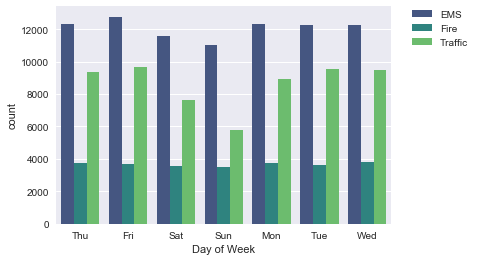

In [22]:

#use seaborn to create a countplot of the day of week column with the hue based off of reason column
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
#to relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

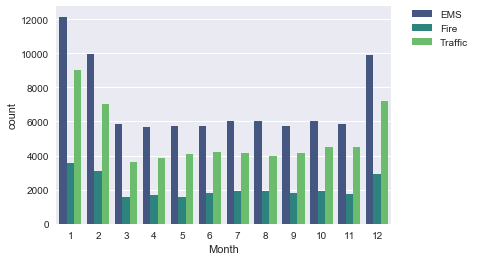

In [23]:
#do the same for the month
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
#to relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

In [24]:
#aggregate by month
byMonth=df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701
2,20107,20107,20107,17757,20107,20107,20104,20107,20107,20107,20107,20107
3,11059,11059,11059,9754,11059,11059,11052,11059,11059,11059,11059,11059
4,11287,11287,11287,9897,11287,11287,11284,11287,11287,11287,11287,11287
5,11374,11374,11374,9938,11374,11374,11371,11374,11374,11374,11374,11374


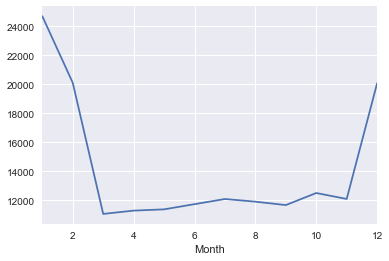

In [25]:
#create a simple plot off of the dataframe indicating the count of calls per month
byMonth['lat'].plot()

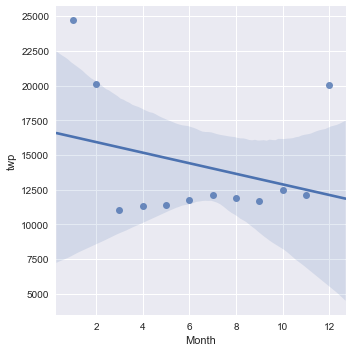

In [26]:
#seaborn's lmplot() to create a linear fit on the calls per month
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())


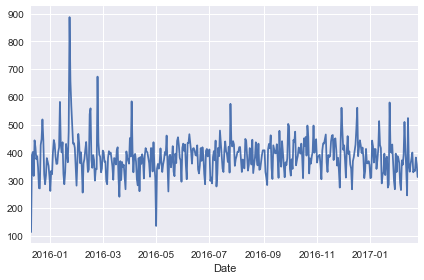

In [27]:
#create "Date" colum
df['Date']=df['timeStamp'].apply(lambda t:t.date())
df.groupby('Date').count().head()
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

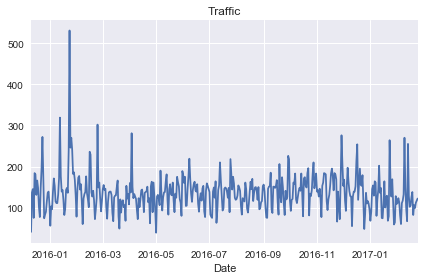

In [28]:
#recreate the plot by reason
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

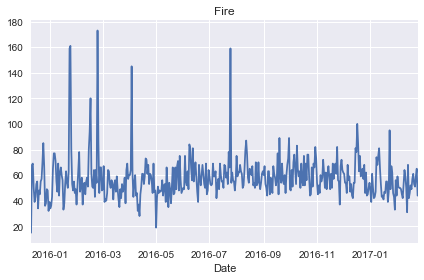

In [29]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

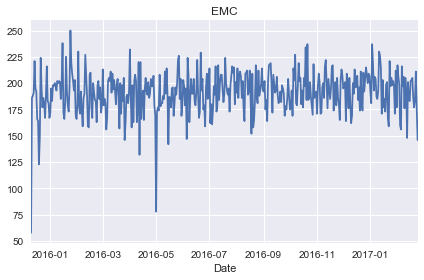

In [31]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMC')
plt.tight_layout()

In [32]:
#use unstack method to create matrix form
dayHour=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

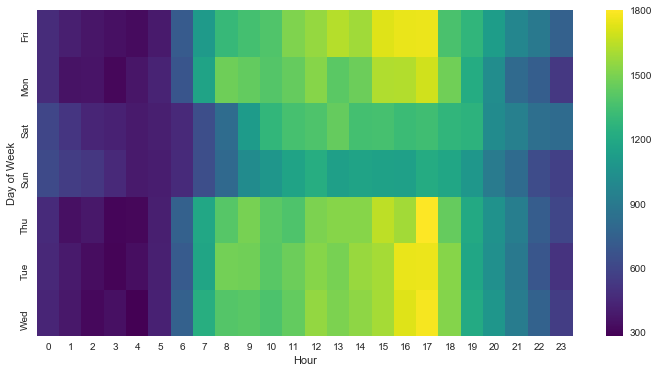

In [33]:
#create heatmap
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

F:\anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


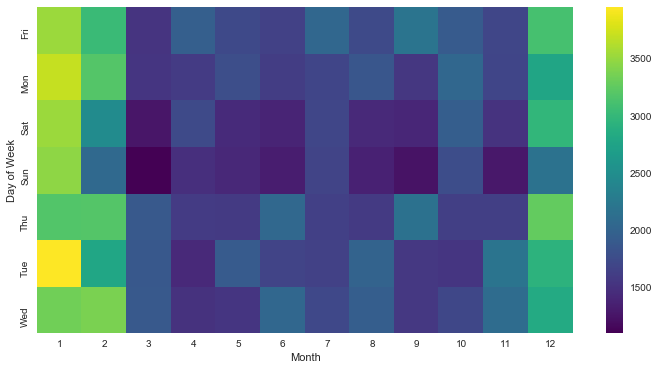

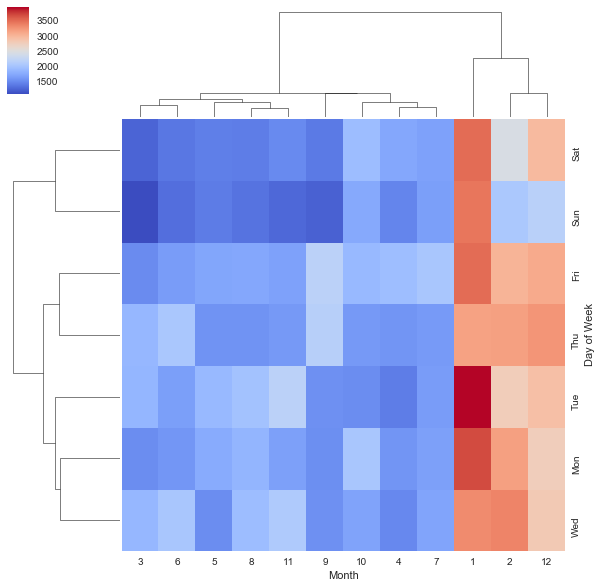

In [34]:
#do the same with daymonth
dayMonth=df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')
sns.clustermap(dayMonth, cmap='coolwarm')